Probability density of species with box plot (for algo 2)

In [1]:
%matplotlib inline
import os
import pickle
from arguments import get_args
import matplotlib.pyplot as plt

args = get_args()

datapath = "prob_density_data"
savepath = "24_2_12_prob_density"
if not os.path.exists(savepath):
   os.makedirs(savepath)

Namespace(exp_name='nh3', lattice_size=50, sim_round=10000000, num_samples=50, end_time=0.00011, alg1_lambda=0.1, alg2_lambda=0.1, alg3_lambda=0.001, tau_max=1e-08, algo=-1, path='24_1_11/')


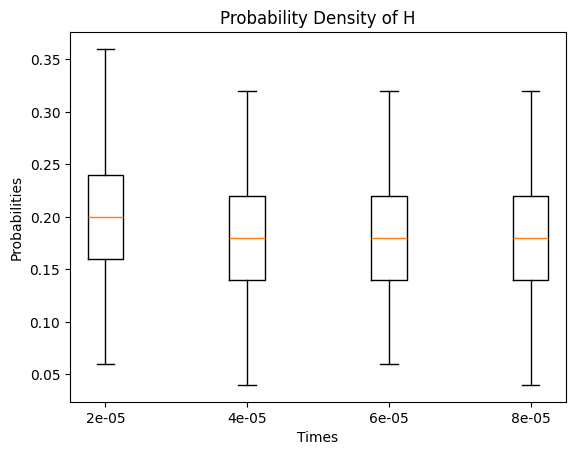

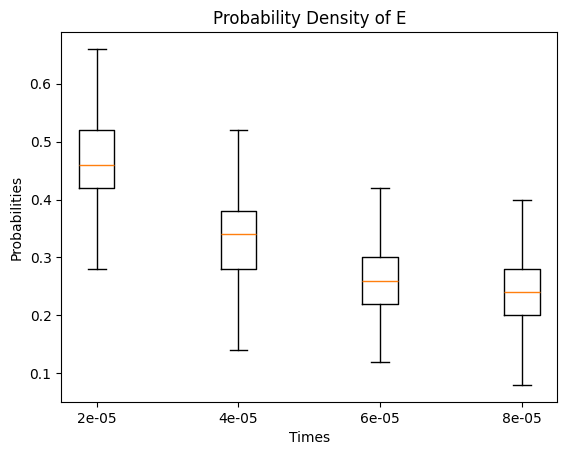

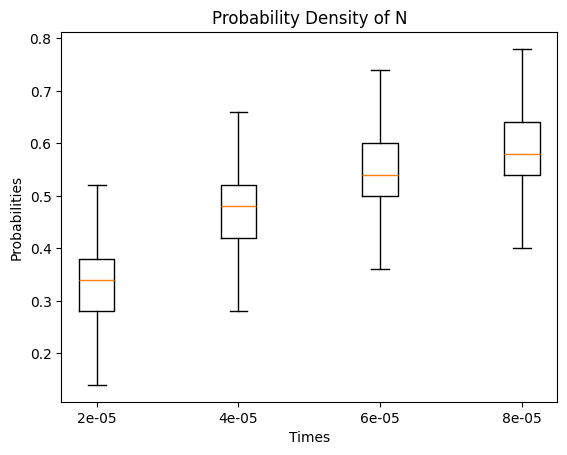

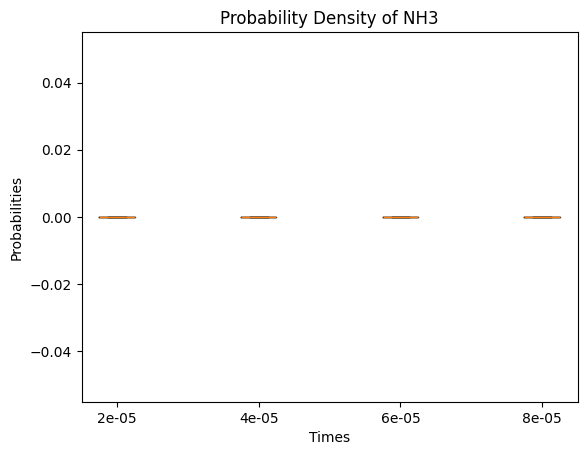

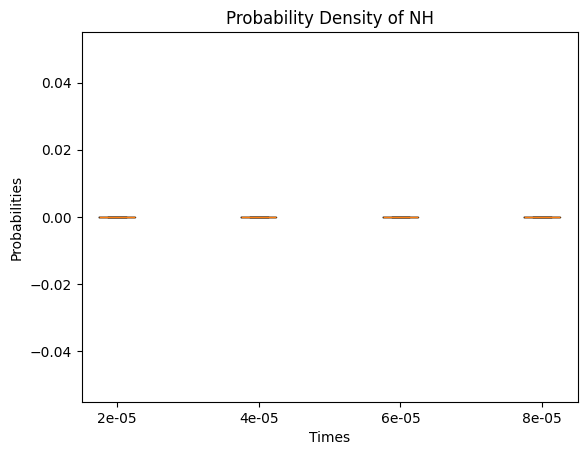

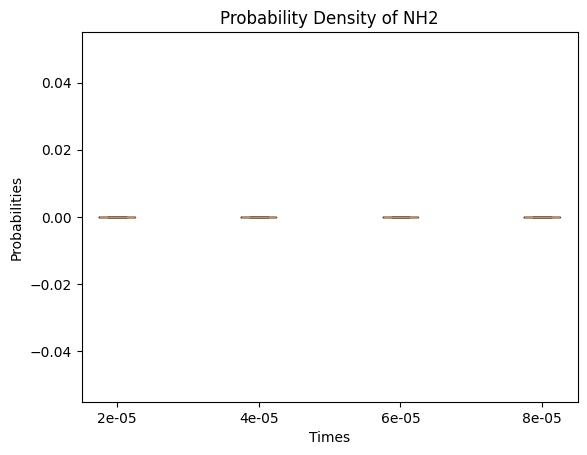

<Figure size 640x480 with 0 Axes>

In [2]:
for m in range(len(args.sim.species_names)):
    if args.sim._init_state[m] == 0: # ignore species that cannot stay on the surface
        continue
    with open(os.path.join(datapath, f"size_{args.lattice_size}_sample_{args.num_samples}_{args.sim.species_names[m]}.pkl"), "rb") as file:    
        res_dict = pickle.load(file)

    # The positions of four boxes on the x-axis.
    positions = [2, 4, 6, 8]
    # The timestamps of four boxes.
    t_stamps = [2e-5, 4e-5, 6e-5, 8e-5]
    # Using the built-in boxplot function in matplotlib
    # res_dict['lattice'] contains 2500 probabilities corresponding to the species.
    plt.boxplot(res_dict['lattice'], positions=positions, showfliers=False)

    
    sp_name = args.sim.species_names[m]
    if sp_name.endswith("_s"):
        sp_name = sp_name[:-2]
    plt.title(f'Probability Density of {sp_name}')
    plt.xlabel('Times')
    plt.ylabel('Probabilities')
    plt.xticks(positions, t_stamps)
    plt.savefig(os.path.join(savepath, f'boxplot_{sp_name}.png'))
    plt.savefig(os.path.join(savepath, f'boxplot_{sp_name}.pdf'))
    plt.show()
    plt.clf()